In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [7]:
X = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
y = df['Species'].values

## The Intuition behind 5x2 fold approach

In [8]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=1000))) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('DSC', DecisionTreeClassifier(random_state = 1, max_depth=2)))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=1)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.96 (0.041)
LDA: 0.98 (0.031)
KNN: 0.96 (0.037)
DSC: 0.94 (0.051)
SVM: 0.96 (0.045)


It seems that LR, KNN and SVM **has same mean with slightly different standard deviation.** However, LDA shows a higher performance, in the other hands, DTC shows the lowest performance over the rest of algorithms. 

### Steps to Hypothesis Testing

The first step would be to to state the null hypothesis statement.

- H0 : Both models have the same performance on the dataset.
- H1 : Both models doesn’t have the same performance on the dataset.

Significance level is 0.05

let’s assume a significance threshold of α=0.05 for rejecting the null hypothesis

LDA Mean Accuracy: 98.0% +/-(0.031)
DecisionTreeClassifier Mean Accuracy: 93.8% +/-(0.052)


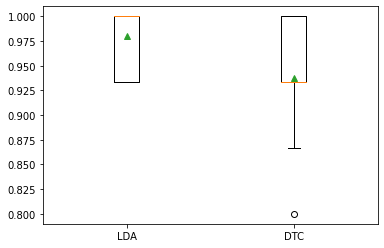

In [17]:
from statistics import mean, stdev
# evaluate model 1
model1 = LinearDiscriminantAnalysis()
cv1 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores1 = cross_val_score(model1, X, y, scoring = 'accuracy', cv = cv1, n_jobs = -1)
print('LDA Mean Accuracy: %.1f%% +/-(%.3f)' % (mean(scores1*100), stdev(scores1)))

# evaluate model 2
model2 = DecisionTreeClassifier(random_state = 1, max_depth=2)
cv2 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores2 = cross_val_score(model2, X, y, scoring = 'accuracy', cv = cv2, n_jobs = -1)
print('DecisionTreeClassifier Mean Accuracy: %.1f%% +/-(%.3f)' % (mean(scores3*100), stdev(scores3)))

# plot the results
plt.boxplot([scores1, scores2], labels=['LDA', 'DTC'], showmeans=True)
plt.show()

Seems that **LDA** has a better performance over the DTCwhere LDAhas a higher accuracy.

## 5 by 2 CV using MLxtend package

In [18]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, 
                          estimator2=model2, 
                          X=X, 
                          y=y, 
                          scoring='accuracy', 
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.027
The t-statistics is = 3.101
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.


Now you have a strong argument about why picking LDA over the DTC.